In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import numpy as np

from sklearn import model_selection
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import (KNeighborsClassifier, KNeighborsRegressor)
# https://stackoverflow.com/questions/25336176/does-scikit-learn-include-a-naive-bayes-classifier-with-continuous-inputs
from sklearn.naive_bayes import GaussianNB
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVC, SVR
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor)
import xgboost
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate
from tabulate import tabulate
from operator import itemgetter

# https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import ast
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split    
from funcs_ml import model_using_train_test_split, model_using_kfold, model_using_time_series_split, model_using_grid_search_cv_with_timeseriessplit
from funcs_ml import feature_selection_by_extra_tree_regressor, feature_selection_by_xgb, xgb_gridsearch_cv, lightgbm_gridsearch_cv
from funcs_ml import test_model_iteratively_with_most_important_features, train_best_model

# Read Data

## Ireland

In [2]:
df_ireland = pd.read_csv("data/final/df_final_irish_beef_feat_cols_and_target_values_1999-2022.csv")

In [3]:
df_ireland

,Unnamed: 0,bullocks_200-249kg,bullocks_250-299kg,bullocks_300-349kg,bullocks_350-399kg,bullocks_400-449kg,bullocks_450-499kg,bullocks_500-549kg,bullocks_550kg+,heifers_200-249kg,...,pork_loin_chops_per_kg,pork_sausages_per_kg,pork_steak_per_kg,potatoes_10_kg,sherry_take_home_75cl_bottle,sirloin_steak_per_kg,stout_draught_bar_1_pint,tomatoes_per_kg,vodka_take_home_70cl_bottle,whiskey_take_home_70cl_bottle
0,1999-01-31,136.83,139.73,133.33,131.07,127.16,120.83,121.28,119.78,83.25,...,6.83387,3.92049,10.11682,6.99516,10.01776,10.42162,2.66192,2.36474,15.45209,17.31772
1,1999-02-28,143.80,140.10,130.93,126.85,122.36,121.99,118.89,122.60,72.94,...,6.92023,3.88620,10.05459,7.10311,10.18159,10.53465,2.66192,2.29743,15.46860,17.31645
2,1999-03-31,146.38,133.37,126.74,121.88,121.34,120.37,123.38,120.78,88.66,...,7.21741,3.89382,9.99236,7.06755,10.20953,10.41908,2.66192,2.10820,15.46098,17.31645
3,1999-04-30,141.20,131.58,121.23,119.14,120.69,124.75,122.41,122.15,76.94,...,7.18693,3.90017,9.81202,6.92150,10.24001,10.65911,2.69240,2.35077,15.42796,17.32788
4,1999-05-31,136.09,122.94,116.59,121.77,123.92,122.61,124.88,121.30,114.15,...,7.30631,3.92303,10.02411,6.83387,10.21715,10.78738,2.73558,2.13360,15.54480,17.63776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2021-10-31,172.03,196.88,185.30,198.15,203.87,201.15,203.94,199.58,222.61,...,7.54300,6.22100,7.84500,7.63800,14.04300,14.20900,4.95000,3.36400,20.49700,25.05500
274,2021-11-30,169.93,174.18,196.74,203.66,199.36,197.53,205.40,204.63,194.16,...,7.39400,6.18800,8.72500,7.63800,14.04300,14.20900,4.94800,3.36800,19.40400,22.93100
275,2021-12-31,210.53,200.10,191.37,208.82,204.46,203.70,201.86,207.42,211.98,...,7.56400,6.22100,7.40200,7.63800,14.04300,14.25800,4.94300,3.37600,18.68800,22.37900
276,2022-01-31,204.89,215.17,221.32,225.42,212.41,223.02,224.50,214.11,245.92,...,7.46200,6.20800,8.37200,7.63800,14.04300,14.25800,4.94600,3.22800,24.54400,27.65700


In [4]:
df_ireland = df_ireland.rename(columns={'Unnamed: 0':"date"})

In [5]:
df_ireland = df_ireland.set_index("date")

In [6]:
df_ireland.columns.sort_values()

Index(['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg',
       'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg',
       'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
       'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
       'bullocks_500-549kg', 'bullocks_550kg+', 'butter_per_lb',
       'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals',
       'compound_feeding_stuffs_for_cattle_excluding_calves',
       'compound_feeding_stuffs_for_pigs',
       'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg',
       'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity',
       'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers',
       'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg',
       'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
       'heifers_350-399kg', 'heifers_400-449kg', 'irish_cheddar_per_kg',
       'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_ch

In [7]:
# these features combind make up the target_cattle target value so they are leaky features
# this basically means including them in the model training would be giving the model future information
# which we couldn't expect to have at the testing phase or whenver we try to do a prediction on new data
leakey_features=[
    'bullocks_200-249kg', 'bullocks_250-299kg', 'bullocks_300-349kg',
    'bullocks_350-399kg', 'bullocks_400-449kg', 'bullocks_450-499kg',
    'bullocks_500-549kg', 'bullocks_550kg+',
    'heifers_200-249kg', 'heifers_250-299kg', 'heifers_300-349kg',
    'heifers_350-399kg', 'heifers_400-449kg']

In [8]:
y_col="target_cattle"

In [9]:
feature_cols = []
for col in df_ireland.columns:
    if col not in leakey_features:
        feature_cols.append(col)
feature_cols = sorted(feature_cols)
print(feature_cols)

['ale_draught_bar_1_pint', 'all_items', 'best_back_rashers_per_kg', 'brandy_take_home_70cl_bottle', 'brent_price', 'broccoli_per_kg', 'butter_per_lb', 'carrots_per_kg', 'cattle', 'cents_per_kg', 'cereals', 'compound_feeding_stuffs_for_cattle_excluding_calves', 'compound_feeding_stuffs_for_pigs', 'compound_feeding_stuffs_for_poultry', 'cooked_ham_per_kg', 'crop_output', 'crude_price', 'diesel', 'diesel_per_ltr', 'electricity', 'eurgbp', 'eurusd', 'feeding_stuffs', 'fertilisers', 'food_and_non-alcoholic_beverages', 'ham_fillet_per_kg', 'irish_cheddar_per_kg', 'jam_per_lb', 'lamb_gigot_chops_per_kg', 'lamb_loin_chops_per_kg', 'lambs_liver_per_kg', 'marmalade_per_lb', 'milk', 'motor_fuel', 'mushrooms_per_kg', 'npk_fertilisers', 'onions_per_kg', 'other_goods_and_services', 'pbeefusdm', 'petrol', 'petrol_unleaded_per_ltr', 'pigs', 'pk_fertilisers', 'plant_protection_products', 'pork_loin_chops_per_kg', 'pork_sausages_per_kg', 'pork_steak_per_kg', 'potatoes', 'potatoes_10_kg', 'poultry', 'rai

In [10]:
feature_cols.remove(y_col)

In [11]:
X_ie = df_ireland[feature_cols]
y_ie = df_ireland[y_col]

https://scikit-learn.org/stable/modules/model_evaluation.html
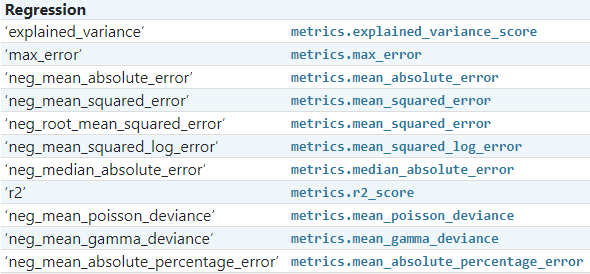

## Australia

In [12]:
df_australia = pd.read_csv("data/final/df_final_australian_beef_feat_cols_and_target_values_1999-2020.csv")

In [13]:
df_australia

,Unnamed: 0,beef_per_kg,meat_consumption,meat_exports,meat_imports,meat_distribution,meat_supply,cattle_production,swine_production_x,barley_production,...,sheep_slaughterings,cpi_all,cpi_residential,cpi_all_ex_food_energy,cpi_food,cpi_prod_index,diesel,petrol,pbeefusdm,crude_price
0,1999-01-31,2.71,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1326.0,62.967263,52.5088,64.117489,68.833314,64.792117,93.8,85.0,77.599998,12.49
1,1999-02-28,2.80,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1467.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,81.825000,12.02
2,1999-03-31,2.79,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1464.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,81.500000,14.68
3,1999-04-30,2.68,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1235.0,63.245879,53.4705,64.354054,68.941204,64.984379,93.8,85.0,79.111111,17.30
4,1999-05-31,2.61,61.833333,104.083333,0.333333,168.083333,168.083333,879.416667,30.166667,419.333333,...,1239.0,63.803111,53.9905,64.836722,69.152023,66.330209,93.8,85.0,79.850000,17.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2020-08-31,6.43,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,108.846065,118.0338,107.521068,106.631196,112.472963,120.3,117.3,200.428571,42.39
260,2020-09-30,6.36,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,108.846065,118.0338,107.521068,106.631196,112.472963,119.6,117.1,197.727273,39.63
261,2020-10-31,6.21,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,108.846065,118.0338,107.521068,106.631196,112.472963,118.9,117.8,190.045455,39.56
262,2020-11-30,6.07,55.750000,122.750000,1.416667,178.500000,178.500000,691.666667,34.916667,1091.666667,...,301.0,109.496169,123.6455,107.958167,106.631196,113.626532,118.2,115.6,190.785714,41.13


In [14]:
df_australia = df_australia.rename(columns={'Unnamed: 0':"date"})

In [15]:
df_australia = df_australia.set_index("date")

In [16]:
y_col_au="beef_per_kg"

In [17]:
feature_cols_au = []
for col in df_australia.columns:
    feature_cols_au.append(col)
feature_cols_au = sorted(feature_cols_au)
feature_cols_au.remove(y_col_au)
print(feature_cols_au)

['audcny', 'audnzd', 'audusd', 'barley_production', 'beef_and_veal_production', 'bulls_bullocks_steers_slaughterings', 'butter_production', 'calves_slaughterings', 'cattle_exclu_calves_slaughterings', 'cattle_exclud_calves_prod', 'cattle_production', 'cheese_production', 'corn_production', 'cotton_production', 'cows_heifers_slaughterings', 'cpi_all', 'cpi_all_ex_food_energy', 'cpi_food', 'cpi_prod_index', 'cpi_residential', 'crude_price', 'diesel', 'lamb_slaughterings', 'lambs_prod', 'meat_consumption', 'meat_distribution', 'meat_exports', 'meat_imports', 'meat_supply', 'milk_powder_production', 'milk_production', 'millet_production', 'nonfatmilk_production', 'oats_production', 'pbeefusdm', 'petrol', 'pig_slaughterings', 'pigs_prod', 'poultry_production', 'rain', 'rice_production', 'sheep_prod', 'sheep_slaughterings', 'sunshine', 'swine_production_x', 'swine_production_y', 'temp_cel', 'total_beef_prod', 'veel_prod', 'wheat_production']


In [18]:
X_au = df_australia[feature_cols_au]
y_au = df_australia[y_col_au]

# Model training

## Normal Train-Test Split

In [ ]:
results_ie = model_using_train_test_split(X_ie, y_ie) # uses 70 30 split

In [ ]:
print(tabulate(results_ie, headers=["model", "r2", "mae", "mse"]))

In [ ]:
results_au = model_using_train_test_split(X_au, y_au) # uses 70 30 split

In [ ]:
print(tabulate(results_au, headers=["model", "r2", "mae", "mse"]))

## K-fold Cross-Validation

In [ ]:
# at the beginning I naively used model_selection.train_test_split() with my time series data
# I then fed this to a standard k-fold cross validator and the prediction results were spectacular
# as can be seen below, the problem is it doesn't make sense to shuffle the time series data..
# and then take random folds of that shuffled data.
# I speculate the reason this naive approach was so accurate in its predictions
# is that gradually over the last twenty years the price of everything has gone up
# so higher prices of other products most likely correlated with higher beef prices

model_using_kfold(X_ie, y_ie)

In [ ]:
model_using_kfold(X_au, y_au)

## TimeSeriesSplit Cross-Validation

In [19]:
results_ie = model_using_time_series_split(X_ie, y_ie)

In [20]:
print(tabulate(results_ie, headers=["model", "tr_r2", "r2", "tr_mae", "mae", "tr_mse", "mse"]))

model                             tr_r2             r2        tr_mae           mae         tr_mse             mse
-------------------------  ------------  -------------  ------------  ------------  -------------  --------------
SVR                         0.245         -8.656        10.961        20.79         262.896         768.983
BayesianRidge               0.946         -5.638         3.381        12.63          20.821         360.367
LGBMRegressor               0.887         -5.363         2.051        12.962         15.557         302.244
KNeighborsRegressor         0.911         -4.852         3.825        13.144         32.878         314.725
SGDRegressor               -1.70234e+26   -3.34806e+27   1.58825e+14   1.82158e+14    3.28112e+28     4.48497e+28
DecisionTreeRegressor       1             -3.802         0            14.013          0             449.952
LinearRegression            0.981        -29.788         2.075        20.038         10.01         1068.88
GradientBoo

In [21]:
results_au = model_using_time_series_split(X_au, y_au)

In [22]:
print(tabulate(results_au, headers=["model", "tr_r2", "r2", "tr_mae", "mae", "tr_mse", "mse"]))

model                             tr_r2             r2       tr_mae          mae       tr_mse          mse
-------------------------  ------------  -------------  -----------  -----------  -----------  -----------
LinearRegression            0.979         -5.918        0.059        0.445        0.006        0.358
DecisionTreeRegressor       1             -5.416        0            0.483        0            0.462
KernelRidge                 0.975         -5.313        0.066        0.441        0.008        0.384
LGBMRegressor               0.882         -3.88         0.086        0.454        0.027        0.399
SVR                         0.099        -20.56         0.428        0.961        0.35         1.73
DummyRegressor              0            -20.497        0.472        0.975        0.418        1.797
XGBRegressor                1             -2.915        0            0.4          0            0.356
RandomForestRegressor       0.986         -2.258        0.047        0.385      

I changed the code from something like:

tscv = TimeSeriesSplit(n_splits=cv_splits)

scores = cross_validate(cls, X, y, cv=tscv, scoring=scoring, return_train_score=True)

to a manual implementation:

for train_index, test_index in tscv.split(X):

            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            

And the results are equally as terrible.


cross_validate attempt is below and manual iteration is currently above (what's in the code).

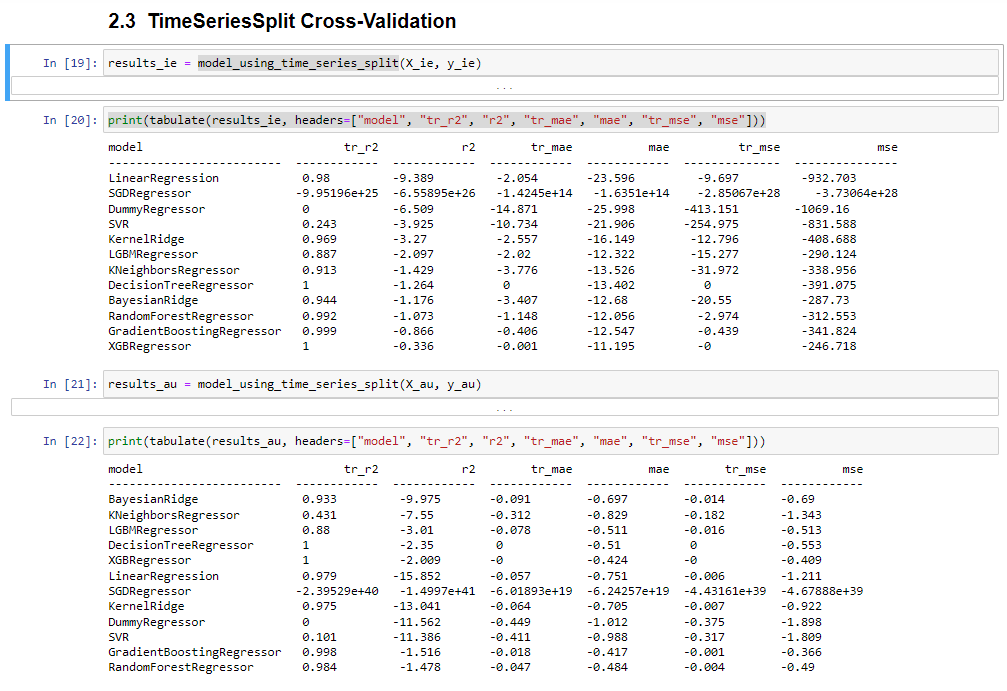

## GridSearchCV

In [ ]:
results_ie = model_using_grid_search_cv_with_timeseriessplit(X_ie, y_ie)

In [ ]:
print(tabulate(results_ie, headers=["model", "r2", "mae", "mse"]))

In [ ]:
results_au = model_using_grid_search_cv_with_timeseriessplit(X_au, y_au)

In [ ]:
print(tabulate(results_au, headers=["model", "r2", "mae", "mse"]))

# Optimize Gradient Boosting methods

## Ireland Gradient Boosters

In [ ]:
results_xgb_ie = test_model_iteratively_with_most_important_features(X_ie, y_ie, xgb_gridsearch_cv)

In [ ]:
results_lightgbm_ie = test_model_iteratively_with_most_important_features(X_ie, y_ie, lightgbm_gridsearch_cv)

In [ ]:
selected_features = ast.literal_eval(results_xgb_ie['selected_features'].values[0])
_, _, _, y_test_ie = train_test_split(X_ie[selected_features], y_ie, test_size=0.2, random_state=42)

In [ ]:
train_best_model


In [ ]:
y_pred_xgb_ie = train_best_model(X_ie, y_ie, results_xgb_ie, XGBRegressor)

In [ ]:
y_pred_lightgbm_ie = train_best_model(X_ie, y_ie, results_lightgbm_ie, LGBMRegressor)

### Plotting

In [ ]:
# Line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_test_ie.values, label='Actual')
plt.plot(y_pred_xgb_ie, label='Predictions using XGB')
plt.plot(y_pred_lightgbm_ie, label='Predictions using LightGBM')
plt.legend()

In [ ]:
scores = pd.concat([results_lightgbm_ie.iloc[:1], results_xgb_ie.iloc[:1]], axis=0).loc[:,'split0_test_score':'mean_test_score']*-100
scores

In [ ]:
# barchart - k-fold
scores['model'] = ['LightGBM', 'XGBoost']
scores.set_index('model', inplace=True)
scores.T.plot(kind='bar', figsize=(20,10))
plt.title('Mean absolute percentage for all k-fold CV ')
plt.xlabel('Model')
plt.ylabel('Mean absolute percentage')

## Australia Gradient Boosters

In [ ]:
results_xgb_au = test_model_iteratively_with_most_important_features(X_au, y_au, xgb_gridsearch_cv)

In [ ]:
results_lightgbm_au = test_model_iteratively_with_most_important_features(X_au, y_au, lightgbm_gridsearch_cv)

In [ ]:
selected_features = ast.literal_eval(results_xgb_au['selected_features'].values[0])
_, _, _, y_test_au = train_test_split(X_au[selected_features], y_au, test_size=0.2, random_state=42)

In [ ]:
y_pred_xgb_au = train_best_model(X_au, y_au, results_xgb_au, XGBRegressor)

In [ ]:
y_pred_lightgbm_au = train_best_model(X_au, y_au, results_lightgbm_au, LGBMRegressor)

### Plotting

In [ ]:
# Line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_test_au.values, label='Actual')
plt.plot(y_pred_xgb_au, label='Predictions using XGB')
plt.plot(y_pred_lightgbm_au, label='Predictions using LightGBM')
plt.legend()

In [ ]:
scores = pd.concat([results_lightgbm_au.iloc[:1], results_xgb_au.iloc[:1]], axis=0).loc[:,'split0_test_score':'mean_test_score']*-100
scores

In [ ]:
# barchart - k-fold
scores['model'] = ['LightGBM', 'XGBoost']
scores.set_index('model', inplace=True)
scores.T.plot(kind='bar', figsize=(20,10))
plt.title('Mean absolute percentage for all k-fold CV ')
plt.xlabel('Model')
plt.ylabel('Mean absolute percentage')

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index) 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
X_ie

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = X_ie
y = y_ie
tscv = TimeSeriesSplit(n_splits=20)
#print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=20)
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index) 
    #print("TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train.shape, X_train.index.min(), X_train.index.max())

In [ ]:
X.shape

In [ ]:
 X.iloc[train_index].shape

In [ ]:
 X.iloc[train_index].columns

In [ ]:
s1 = pd.Series([1, 2, 3])

In [ ]:
s1

In [ ]:
s1.mean()

In [ ]:
s1.append(pd.Series(4))

In [ ]:
s1.mean()